使用块的网络VGG

VGG块

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(
            nn.Conv2d(
                in_channels,
                out_channels,
                kernel_size=3,
                padding=1
            )
        )
        layers.append(
            nn.ReLU()
        )
        in_channels = out_channels
    layers.append(
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    
    return nn.Sequential(*layers)
        

这段代码定义了一个函数 `vgg_block`，该函数用于创建 VGG 网络中的一个卷积块。下面是代码中各部分的解释：

1. `import torch`: 导入 PyTorch 库，用于构建神经网络和进行张量计算。
2. `from torch import nn`: 从 PyTorch 库中导入神经网络模块，用于构建神经网络层。
3. `from d2l import torch as d2l`: 从 D2L（Dive into Deep Learning）库中导入 PyTorch 版本的工具，用于简化代码。
4. `def vgg_block(num_convs, in_channels, out_channels):`: 定义了一个名为 `vgg_block` 的函数，该函数接受三个参数：`num_convs`（表示卷积层的数量）、`in_channels`（输入通道数）和 `out_channels`（输出通道数）。
5. `layers = []`: 创建一个空列表，用于存储卷积块的各层。
6. `for _ in range(num_convs):`: 循环 `num_convs` 次，该循环用于创建指定数量的卷积层。
7. `layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))`: 向 `layers` 列表中添加一个 2D 卷积层。这里使用了 PyTorch 中的 `nn.Conv2d` 类，指定了输入通道数 `in_channels`、输出通道数 `out_channels`、卷积核大小为 3x3、填充大小为 1。
8. `layers.append(nn.ReLU())`: 向 `layers` 列表中添加一个 ReLU 激活函数，用于引入非线性。
9. `in_channels = out_channels`: 更新输入通道数，以便下一层卷积层使用上一层的输出通道数作为输入。
10. `layers.append(nn.MaxPool2d(kernel_size=2, stride=2))`: 向 `layers` 列表中添加一个最大池化层。这里使用了 PyTorch 中的 `nn.MaxPool2d` 类，指定了池化核大小为 2x2、步幅为 2。
11. `return nn.Sequential(*layers)`: 将 `layers` 列表中的层按顺序连接成一个序列，并返回这个序列作为一个整体。

因此，`vgg_block` 函数的作用是创建一个 VGG 网络中的一个卷积块，该卷积块包含若干个卷积层（每个卷积层后跟一个 ReLU 激活函数）和一个最大池化层，并将它们组合成一个序列。

VGG网络

In [3]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))


In [4]:
def vgg(conv_arg):
    conv_blks = []
    in_channels = 1
    # 卷积部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(
            vgg_block(
                num_convs, in_channels, out_channels
            )
        )
        in_channels = out_channels
        
    return nn.Sequential(
        *conv_blks,
        nn.Flatten(),
        # 全连接层
        nn.Linear(out_channels * 7 * 7, 4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096, 10)
    )

这段代码定义了一个函数 `vgg`，用于构建 VGG 网络。下面是代码中各部分的解释：

1. `conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))`: 定义了一个元组 `conv_arch`，其中包含了每个卷积块的配置信息。每个元组的第一个元素表示卷积层的数量，第二个元素表示输出通道数。

2. `def vgg(conv_arg):`: 定义了一个名为 `vgg` 的函数，该函数接受一个参数 `conv_arg`，这里似乎应该为 `conv_arch`。

3. `conv_blks = []`: 创建一个空列表，用于存储 VGG 网络中的各个卷积块。

4. `in_channels = 1`: 初始化输入通道数为 1。这是因为该 VGG 网络的输入是灰度图像，所以只有一个通道。

5. `for (num_convs, out_channels) in conv_arch:`: 遍历 `conv_arch` 中的每个元组，每次迭代提取出卷积层的数量和输出通道数。

6. `conv_blks.append(vgg_block(num_convs, in_channels, out_channels))`: 调用 `vgg_block` 函数，根据当前迭代中的卷积块配置信息创建一个卷积块，并将其添加到 `conv_blks` 列表中。

7. `in_channels = out_channels`: 更新输入通道数为当前卷积块的输出通道数，以便作为下一个卷积块的输入通道数。

8. `return nn.Sequential(*conv_blks, nn.Flatten(), nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5), nn.Linear(4096, 10))`: 使用 `nn.Sequential` 将卷积块序列、Flatten 层和全连接层连接起来，并返回整个网络。这里的全连接层结构是：一个具有 4096 个神经元的全连接层、一个 ReLU 激活函数、一个 Dropout 层（用于正则化），最后是一个具有 10 个神经元的全连接层（用于分类任务，这里的 10 表示类别数）。

在这段代码中，`nn.Linear(out_channels * 7 * 7, 4096)` 中的 7*7 是基于输入特征的尺寸。通常在卷积神经网络中，随着卷积层的堆叠，特征图的尺寸会逐渐减小，而通道数量会逐渐增加。当我们在网络的全连接层之前展平特征图时，需要确保展平后的特征具有一致的大小，以便输入到全连接层中。

在 VGG 网络中，卷积层使用了 2x2 的最大池化层，步幅为 2，因此每个最大池化层会将特征图的尺寸减小一半。由于最大池化层使用了步幅为 2 的池化操作，因此每经过一个最大池化层，特征图的尺寸会减半。对于输入尺寸为 224x224 的图像，在 VGG 网络的卷积层堆叠之后，经过多次卷积和池化后，特征图的尺寸会减小到 7x7。因此，在全连接层之前，我们需要将这个 7x7 的特征图展平成一个一维向量，以便输入到全连接层中进行分类。

因此，`nn.Linear(out_channels * 7 * 7, 4096)` 中的 7*7 是基于 VGG 网络中卷积和池化操作之后特征图的尺寸。

在VGG网络的设计中，4096是一个经验值，它代表了全连接层中隐藏单元的数量。这个值并不是从数据或者理论上得出的，而是根据实验和经验进行调整和选择的。

在VGG网络中，全连接层通常用于将卷积特征映射到输出类别的空间中，以便进行分类。4096是一种常见的选择，它足够大以允许网络学习复杂的特征，但又不至于过大导致过度拟合（overfitting）。

实际上，4096这个值并不是固定的，可以根据任务的复杂度、训练数据的规模等因素进行调整。有时候也会使用其他的隐藏单元数量，比如1024或2048，取决于具体的应用场景和实验结果。

In [5]:
net = vgg(conv_arch)

观察每个层输出的形状

In [6]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape;\t', X.shape)

Sequential output shape;	 torch.Size([1, 64, 112, 112])
Sequential output shape;	 torch.Size([1, 128, 56, 56])
Sequential output shape;	 torch.Size([1, 256, 28, 28])
Sequential output shape;	 torch.Size([1, 512, 14, 14])
Sequential output shape;	 torch.Size([1, 512, 7, 7])
Flatten output shape;	 torch.Size([1, 25088])
Linear output shape;	 torch.Size([1, 4096])
ReLU output shape;	 torch.Size([1, 4096])
Dropout output shape;	 torch.Size([1, 4096])
Linear output shape;	 torch.Size([1, 10])


由于VGG-11的计算量更大，因此我们构造了一个通道数更少的网络

In [7]:
ratio = 4
small_conv_arch = [
    (pair[0], pair[1] // ratio) for pair in conv_arch
]
net = vgg(small_conv_arch)

这段代码用于测试构建的 VGG 网络的输出形状。让我们逐行解释：

1. `net = vgg(conv_arch)`: 这一行调用了之前定义的 `vgg` 函数，传入了 `conv_arch` 参数，得到了构建好的 VGG 网络 `net`。

2. `X = torch.randn(size=(1, 1, 224, 224))`: 创建了一个形状为 (1, 1, 224, 224) 的随机输入张量 `X`，这个张量模拟了一张单通道（灰度）的大小为 224x224 的图像。

3. `for blk in net:`: 开始遍历 `net` 中的每个模块（包括卷积块和全连接层）。

4. `X = blk(X)`: 对输入张量 `X` 应用当前遍历到的模块 `blk`，这会得到一个新的输出张量 `X`，作为下一个模块的输入。

5. `print(blk.__class__.__name__, 'output shape;\t', X.shape)`: 打印当前模块的类名以及其输出张量的形状。这里使用了 `blk.__class__.__name__` 来获取模块的类名，并使用 `X.shape` 获取张量的形状。

这段代码的主要目的是为了检查网络各层的输出形状，以确保网络的构建没有错误，并且每一层的输入输出形状都符合预期。

模型训练

In [8]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.129, train acc 0.952, test acc 0.920
44.9 examples/sec on cuda:0


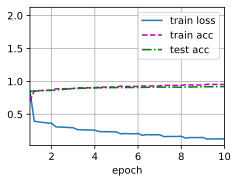

In [9]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())